# #WORDLE

**Basic EDA for Wordle Tweets!**

![header](wordle_logo.jpg)

Author: Klenn Dungaran \
Date: May 2024

<br>

# IMPORTS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

plt.style.use('ggplot')

In [3]:
# Importing the Dataset

df_tweets = pd.read_csv('Dataset/tweets.csv')

In [4]:
df_tweets.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text
0,210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
1,210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩
2,210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩
3,210,1482553436910628866,2022-01-16 03:20:58+00:00,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩
4,210,1482553445726908420,2022-01-16 03:21:00+00:00,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩


In [5]:
print(df_tweets['tweet_text'][0])

Wordle 210 4/6

⬛⬛🟨🟨⬛
🟩⬛⬛⬛⬛
🟩🟩🟨⬛⬛
🟩🟩🟩🟩🟩


# DATA PREPARATION AND CLEANING

In [6]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178454 entries, 0 to 1178453
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   wordle_id       1178454 non-null  int64 
 1   tweet_id        1178454 non-null  int64 
 2   tweet_date      1178454 non-null  object
 3   tweet_username  1178454 non-null  object
 4   tweet_text      1178454 non-null  object
dtypes: int64(2), object(3)
memory usage: 45.0+ MB


In [7]:
# Adding `tweet_datetime` column
df_tweets['tweet_datetime'] = pd.to_datetime(df_tweets['tweet_date'])

# Getting only the date from `tweet_date` column instead of datetime
df_tweets['tweet_date'] = df_tweets['tweet_datetime'].dt.date

# Adding `n_attempts` column
df_tweets['n_attempts'] = df_tweets['tweet_text'].str[11].astype('int')

In [8]:
df_tweets

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,n_attempts
0,210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00,4
1,210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00,4
2,210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:55+00:00,4
3,210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:58+00:00,3
4,210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:21:00+00:00,3
...,...,...,...,...,...,...,...
1178449,519,1594492773662871553,2022-11-21,MaureenLamont,Wordle 519 2/6\n\n⬜🟩🟨🟨⬜\n🟩🟩🟩🟩🟩,2022-11-21 00:47:56+00:00,2
1178450,519,1594492932115124226,2022-11-21,Meeshbeer,Wordle 519 3/6\n\n⬜🟨🟩🟨⬜\n⬜🟩🟩🟩🟩\n🟩🟩🟩🟩🟩,2022-11-21 00:48:33+00:00,3
1178451,519,1594493005192658944,2022-11-21,BookChickie,Wordle 519 3/6\n\n⬛🟩🟩⬛🟩\n🟩🟩🟩⬛🟩\n🟩🟩🟩🟩🟩,2022-11-21 00:48:51+00:00,3
1178452,519,1594493051824754689,2022-11-21,aceynay,Wordle 519 3/6\n\n🟨🟩⬜⬜🟩\n🟩🟩🟩⬜🟩\n🟩🟩🟩🟩🟩\n\nI pla...,2022-11-21 00:49:02+00:00,3


In [9]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178454 entries, 0 to 1178453
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype              
---  ------          --------------    -----              
 0   wordle_id       1178454 non-null  int64              
 1   tweet_id        1178454 non-null  int64              
 2   tweet_date      1178454 non-null  object             
 3   tweet_username  1178454 non-null  object             
 4   tweet_text      1178454 non-null  object             
 5   tweet_datetime  1178454 non-null  datetime64[ns, UTC]
 6   n_attempts      1178454 non-null  int32              
dtypes: datetime64[ns, UTC](1), int32(1), int64(2), object(3)
memory usage: 58.4+ MB


# DATA ANALYSIS

### Wordle tweets per day

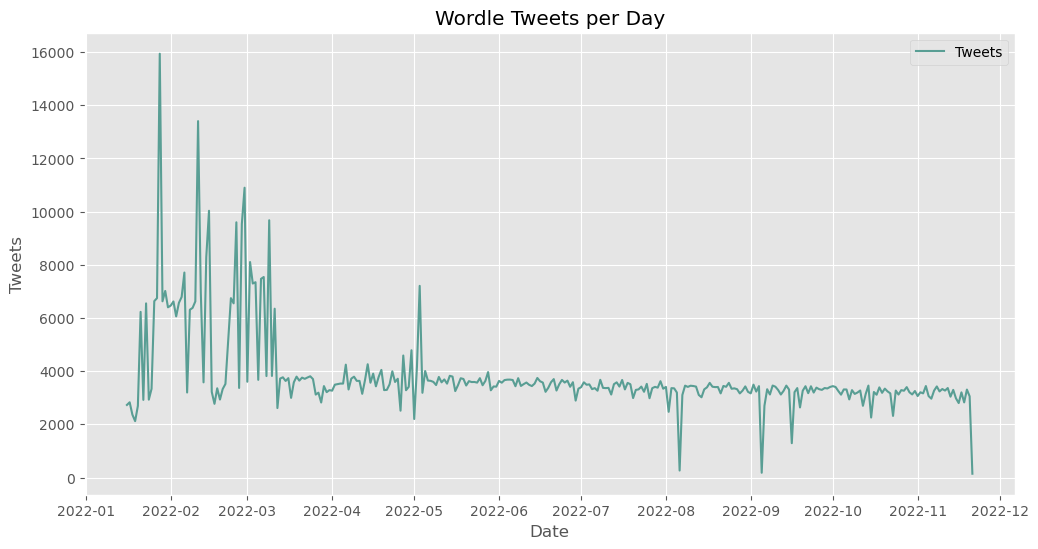

In [10]:
tweets = df_tweets['tweet_date'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

plt.plot(tweets, color='#599e94', label='Tweets')
plt.ylabel('Tweets')
plt.xlabel('Date')
plt.title('Wordle Tweets per Day')
plt.legend(loc='upper right')

plt.show()

* Wordle had a massive trend in the 1st quarter of 2022 and slowly lose it throughout the year.
* The peak on late January is when the New York Times took over Wordle.

<br>

### Number of Attempts per Wordle

In [11]:
attempts = df_tweets.groupby('wordle_id')['n_attempts'].value_counts().unstack()

attempts.style.background_gradient(axis=1, cmap='BuGn')

n_attempts,2,3,4,5,6
wordle_id,,,,,
210,222,897,1064,489,165
211,196,903,1016,564,215
212,191,787,820,413,188
213,51,260,630,697,481
214,383,1012,823,363,122
215,246,877,1017,579,224
216,461,1952,2078,1199,415
217,102,566,1031,843,418
218,170,1009,1384,730,187


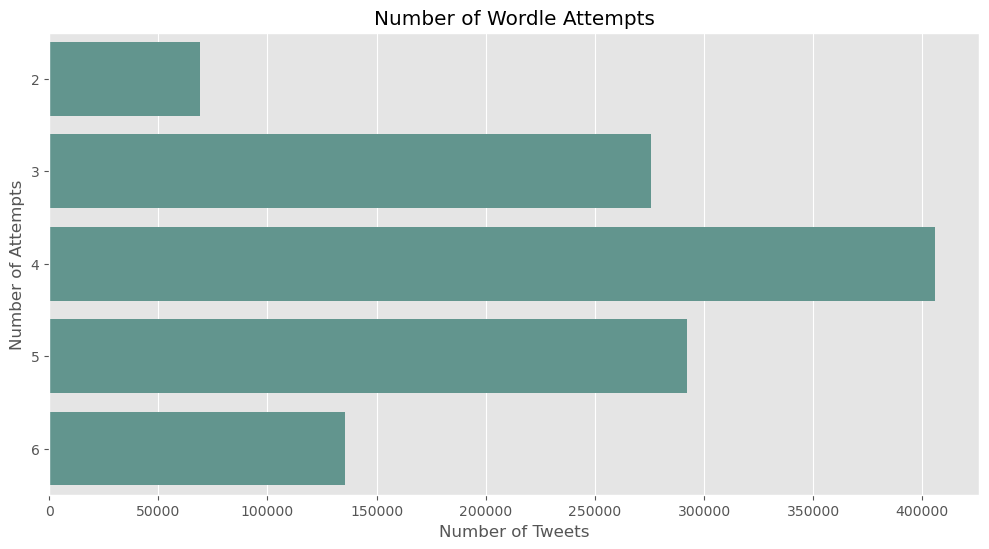

In [12]:
# Number of wordle attempts

attemptsPer = df_tweets['n_attempts'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

sns.barplot(attemptsPer, orient='h', color='#599e94')
plt.title('Number of Wordle Attempts')
plt.ylabel('Number of Attempts')
plt.xlabel('Number of Tweets')

plt.show()

* Most players solved the word puzzle on their 3rd/4th/5th attempt with a normal distribution around it.
* It's more likely for players to solve the puzzle on their 5th or 6th attempt rather than their 2nd attempt.

<br>

### Hardest Wordles

In [13]:
# Create `total_attempts` column
attempts['total_attempts'] = attempts[[2, 3, 4, 5, 6]].sum(axis=1)

# Get the success rate of each number of attempts
for i in range(2, 7):
    attempts[f'sr_{i}'] = round((attempts[i] / attempts['total_attempts']) * 100, 2)

In [14]:
# Getting the top 5 hardest Wordle
hardest = attempts.sort_values('sr_6', ascending=False)
hardest.head()

n_attempts,2,3,4,5,6,total_attempts,sr_2,sr_3,sr_4,sr_5,sr_6
wordle_id,,,,,,,,,,,
491,27,125,380,731,1028,2291,1.18,5.46,16.59,31.91,44.87
409,14,142,494,837,955,2442,0.57,5.81,20.23,34.28,39.11
454,11,92,251,372,446,1172,0.94,7.85,21.42,31.74,38.05
375,28,189,726,1023,861,2827,0.99,6.69,25.68,36.19,30.46
245,43,302,684,1026,878,2933,1.47,10.30,23.32,34.98,29.94


#### **5 Hardest Wordle**

1. **Wordle ID 491** | Success Rate of **44.87%** on the 6th attempt

<details>
<summary>Answer</summary>
MUMMY
</details>

2. **Wordle ID 409** | Success Rate of **39.11%** on the 6th attempt
        
<details>
<summary>Answer</summary>
COYLY
</details>

3. **Wordle ID 454** | Success Rate of **38.05%** on the 6th attempt

<details>
<summary>Answer</summary>
PARER
</details>

 4. **Wordle ID 375** | Success Rate of **30.46%** on the 6th attempt

<details>
<summary>Answer</summary>
GAWKY
</details>

5. **Wordle ID 245** | Success Rate of **29.94%** on the 6th attempt

<details>
<summary>Answer</summary>
SWILL
</details>

<br>

### Most Common Letters

In [15]:
# Importing wordle answers
df_answers = pd.read_csv('Dataset/wordleAnswers.csv')

df_answers.head()

,date,wordle_id,word
0,"November 20, 2022",519,BRAVE
1,"November 19, 2022",518,AVERT
2,"November 18, 2022",517,GLYPH
3,"November 17, 2022",516,THERE
4,"November 16, 2022",515,BAKER


In [16]:
# Loop to extract each letter and place it into a new column
for i in range(5):
    df_answers[f'letter_{i+1}'] = df_answers['word'].str[i]

# Combine all letter columns into a single series
all_letters = pd.concat([df_answers[f'letter_{i+1}'] for i in range(5)])

# Use value_counts to count the occurrences of each letter
letter_counts = all_letters.value_counts()


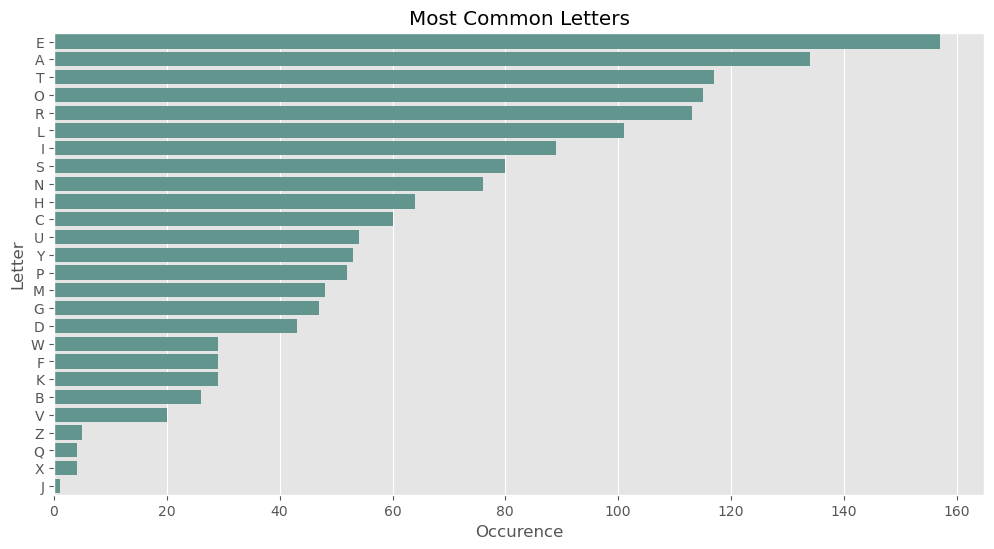

In [17]:
# Plotting
plt.figure(figsize=(12, 6))

sns.barplot(letter_counts, orient='h', color='#599e94')
plt.title('Most Common Letters')
plt.ylabel('Letter')
plt.xlabel('Occurence')

plt.show()

* The most frequently occuring letters in Wordle are **'E', 'A', 'T', 'O', 'R', and 'L'**.
* Vowels especially **'A', 'E', and 'O'** are very common.
* A strategic approach on solving the puzzle more efficiently can be done by using the combination of these letters on the first guess.
* The least frequently occuring letters in Wordle are **'J', 'X', 'Q', and 'Z'**. It is best to avoid these on the first guess.